<a href="https://colab.research.google.com/github/JazzGoncalves/PrimeirosPassos_DataScience/blob/main/Pandas_IO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criando os registros dos alunos

In [269]:
import pandas as pd

In [270]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")

In [271]:
nomes_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [272]:
nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [273]:
print("Quantidade total de alunos: " + str(len(nomes_f) + len(nomes_m)))

Quantidade total de alunos: 400


In [274]:
alunos = (nomes_f,nomes_m)

In [275]:
alunos

(          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   198

In [276]:
nomes = pd.concat(alunos)['nome'].to_frame()

In [277]:
nomes

,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA
...,...
195,WALTER
196,ARLINDO
197,MICHAEL
198,ALVARO


In [278]:
nomes.sample(5)

,nome
138,CLEBER
53,ELAINE
106,ARTUR
97,OSVALDO
8,PATRICIA


In [279]:
nomes.sample(5)

,nome
23,LARISSA
114,ELZA
118,VANIA
195,ROSANE
18,VANESSA


# Incluindo a identificação dos alunos

In [280]:
import numpy as np

In [281]:
np.random.seed(123)

In [282]:
total_alunos = len(nomes)
total_alunos

400

In [283]:
nomes['Id_alunos'] = np.random.permutation(total_alunos) + 1

In [284]:
nomes.sample(30)

,nome,Id_alunos
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111
84,SEVERINO,78
104,EVA,13
36,ROBERTO,364
4,ADRIANA,343
67,HENRIQUE,64


In [285]:
dominios = ['@dominiodoemmail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [286]:
nomes.sample(10)

,nome,Id_alunos,dominio
84,SEVERINO,78,@dominiodoemmail.com.br
0,JOSE,331,@servicodoemail.com
179,IAGO,340,@dominiodoemmail.com.br
10,SANDRA,174,@dominiodoemmail.com.br
171,TERESINHA,45,@dominiodoemmail.com.br
18,VANESSA,42,@dominiodoemmail.com.br
36,DEBORA,338,@dominiodoemmail.com.br
190,NATANAEL,58,@servicodoemail.com
174,CLEONICE,90,@servicodoemail.com
123,EVANDRO,52,@dominiodoemmail.com.br


In [287]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [288]:
nomes.sample(10)

,nome,Id_alunos,dominio,email
114,ARTHUR,320,@dominiodoemmail.com.br,arthur@dominiodoemmail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemmail.com.br,helena@dominiodoemmail.com.br
183,IRACI,8,@dominiodoemmail.com.br,iraci@dominiodoemmail.com.br
189,DALVA,137,@dominiodoemmail.com.br,dalva@dominiodoemmail.com.br
71,MARTA,265,@servicodoemail.com,marta@servicodoemail.com
27,GUILHERME,327,@dominiodoemmail.com.br,guilherme@dominiodoemmail.com.br
180,LIDIA,167,@dominiodoemmail.com.br,lidia@dominiodoemmail.com.br
90,FABIANO,365,@servicodoemail.com,fabiano@servicodoemail.com
2,ANTONIO,205,@dominiodoemmail.com.br,antonio@dominiodoemmail.com.br


# Criando acervo de cursos


In [289]:
!pip3 install html5lib
!pip3 install lxml

In [290]:
import html5lib

In [291]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [292]:
type(cursos)

list

In [293]:
cursos = cursos[0]

In [294]:
type(cursos)

pandas.core.frame.DataFrame

In [295]:
cursos

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [296]:
cursos.head(5)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o index de cursos

In [297]:
cursos = cursos.rename(columns={'Nome do curso': 'nome_do_curso'})
cursos.head(2)

,nome_do_curso
0,Lógica de programação
1,Java para Web


In [298]:
cursos['id'] = cursos.index + 1
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [299]:
cursos = cursos.set_index('id')
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [300]:
nomes.sample(5)

,nome,Id_alunos,dominio,email
59,ISABEL,83,@dominiodoemmail.com.br,isabel@dominiodoemmail.com.br
172,REBECA,165,@servicodoemail.com,rebeca@servicodoemail.com
130,JUNIOR,184,@dominiodoemmail.com.br,junior@dominiodoemmail.com.br
70,JOAQUIM,248,@servicodoemail.com,joaquim@servicodoemail.com
171,VALDEMIR,3,@dominiodoemmail.com.br,valdemir@dominiodoemmail.com.br


# Matriculando os alunos nos cursos

In [301]:
nomes.sample(5)

,nome,Id_alunos,dominio,email
189,DALVA,137,@dominiodoemmail.com.br,dalva@dominiodoemmail.com.br
144,VINICIOS,147,@servicodoemail.com,vinicios@servicodoemail.com
69,TEREZA,151,@servicodoemail.com,tereza@servicodoemail.com
105,PABLO,141,@dominiodoemmail.com.br,pablo@dominiodoemmail.com.br
109,CELSO,266,@servicodoemail.com,celso@servicodoemail.com


In [302]:
nomes['matriculas'] = np.random.exponential(size=total_alunos).astype(int)
nomes.sample(5)

,nome,Id_alunos,dominio,email,matriculas
15,LETICIA,347,@dominiodoemmail.com.br,leticia@dominiodoemmail.com.br,0
157,JAIME,214,@servicodoemail.com,jaime@servicodoemail.com,0
36,ROBERTO,364,@dominiodoemmail.com.br,roberto@dominiodoemmail.com.br,0
91,CELIA,367,@dominiodoemmail.com.br,celia@dominiodoemmail.com.br,1
183,MARLON,74,@servicodoemail.com,marlon@servicodoemail.com,0


In [303]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos)).astype(int)
nomes.sample(5)

,nome,Id_alunos,dominio,email,matriculas
92,DIOGO,61,@servicodoemail.com,diogo@servicodoemail.com,1
193,LUCILENE,146,@dominiodoemmail.com.br,lucilene@dominiodoemmail.com.br,1
79,VALDIR,307,@servicodoemail.com,valdir@servicodoemail.com,2
6,PEDRO,67,@dominiodoemmail.com.br,pedro@dominiodoemmail.com.br,2
126,SEBASTIANA,30,@dominiodoemmail.com.br,sebastiana@dominiodoemmail.com.br,1


In [304]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)
nomes.sample(5)

,nome,Id_alunos,dominio,email,matriculas
98,GILSON,134,@dominiodoemmail.com.br,gilson@dominiodoemmail.com.br,1
17,FELIPE,113,@servicodoemail.com,felipe@servicodoemail.com,5
128,EDVALDO,313,@servicodoemail.com,edvaldo@servicodoemail.com,3
137,NAIR,129,@servicodoemail.com,nair@servicodoemail.com,1
24,CLAUDIA,16,@servicodoemail.com,claudia@servicodoemail.com,4


In [305]:
nomes.matriculas.describe()

count    400.000000
mean       2.032500
std        1.389702
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       11.000000
Name: matriculas, dtype: float64

In [306]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


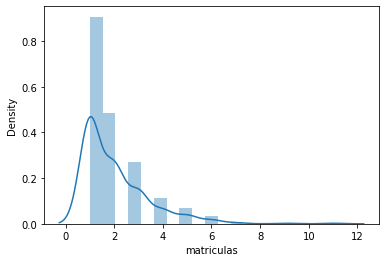

In [307]:
sns.distplot(nomes.matriculas)

In [308]:
nomes.matriculas.value_counts()

1     191
2     102
3      57
4      24
5      15
6       7
7       2
11      1
9       1
Name: matriculas, dtype: int64

In [309]:
nomes.sample(5)

,nome,Id_alunos,dominio,email,matriculas
115,MILTON,104,@servicodoemail.com,milton@servicodoemail.com,3
185,JONATAN,127,@servicodoemail.com,jonatan@servicodoemail.com,1
67,PAULA,212,@dominiodoemmail.com.br,paula@dominiodoemmail.com.br,2
35,CARLA,262,@dominiodoemmail.com.br,carla@dominiodoemmail.com.br,3
70,ISABELA,73,@dominiodoemmail.com.br,isabela@dominiodoemmail.com.br,3


# Selecionando os cursos para os alunos

In [310]:
nomes.sample(5)

,nome,Id_alunos,dominio,email,matriculas
80,TAIS,179,@dominiodoemmail.com.br,tais@dominiodoemmail.com.br,2
99,DENISE,39,@servicodoemail.com,denise@servicodoemail.com,1
27,GUILHERME,327,@dominiodoemmail.com.br,guilherme@dominiodoemmail.com.br,2
159,SELMA,118,@dominiodoemmail.com.br,selma@dominiodoemmail.com.br,1
46,FABIANA,358,@servicodoemail.com,fabiana@servicodoemail.com,2


In [311]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [312]:
for index, row in nomes.iterrows():
  id = row.Id_alunos
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])
matriculas.head(5)

,id_aluno,id_curso
0,235,8
1,235,2
2,43,8
3,43,2
4,43,20


In [313]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,37,Lógica de programação
2,74,Java para Web
3,78,C# para Web
4,31,Ruby on Rails
5,21,Cursos de Python
6,45,PHP com MySql
7,9,.NET para web
8,91,Novas integrações com Java
9,25,TDD com Java


In [314]:
nomes.sample(3)

,nome,Id_alunos,dominio,email,matriculas
184,ALISON,48,@servicodoemail.com,alison@servicodoemail.com,1
17,FELIPE,113,@servicodoemail.com,felipe@servicodoemail.com,5
77,ELIAS,360,@dominiodoemmail.com.br,elias@dominiodoemmail.com.br,3


In [315]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [316]:
matriculas.head()

,id_aluno,id_curso
0,235,8
1,235,2
2,43,8
3,43,2
4,43,20


In [317]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

In [318]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,37,Lógica de programação
2,74,Java para Web
3,78,C# para Web
4,31,Ruby on Rails
5,21,Cursos de Python


In [319]:
# Dados organizados em diferentes formados

In [320]:
matriculas_por_curso.head(10)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,37,Lógica de programação
2,74,Java para Web
3,78,C# para Web
4,31,Ruby on Rails
5,21,Cursos de Python
6,45,PHP com MySql
7,9,.NET para web
8,91,Novas integrações com Java
9,25,TDD com Java


In [321]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [322]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,37,Lógica de programação
1,74,Java para Web
2,78,C# para Web
3,31,Ruby on Rails
4,21,Cursos de Python
5,45,PHP com MySql
6,9,.NET para web
7,91,Novas integrações com Java
8,25,TDD com Java
9,9,Código limpo com C#


In [323]:
matriculas_json = matriculas_por_curso.to_json()
matriculas_json

'{"quantidade_de_alunos":{"1":37,"2":74,"3":78,"4":31,"5":21,"6":45,"7":9,"8":91,"9":25,"10":9,"11":10,"12":87,"13":24,"14":25,"15":29,"16":61,"17":78,"18":20,"19":13,"20":46},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [324]:
matriculas_html = matriculas_por_curso.to_html()
matriculas_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>quantidade_de_alunos</th>\n      <th>nome_do_curso</th>\n    </tr>\n    <tr>\n      <th>id_curso</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>1</th>\n      <td>37</td>\n      <td>Lógica de programação</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>74</td>\n      <td>Java para Web</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>78</td>\n      <td>C# para Web</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>31</td>\n      <td>Ruby on Rails</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>21</td>\n      <td>Cursos de Python</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>45</td>\n      <td>PHP com MySql</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>9</td>\n      <td>.NET para web</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>91</td>\n      <td>Novas integrações com Java</td>\n 

In [325]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>37</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>74</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>78</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>31</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>21</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>45</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>9</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>91</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>25</td>
 

In [326]:
# Criando o banco de dados com SQL

In [327]:
!pip3 install sqlalchemy

In [328]:
from sqlalchemy import create_engine, MetaData, Table, inspect

In [329]:
engine = create_engine('sqlite:///:memory:')

In [330]:
engine

Engine(sqlite:///:memory:)

In [331]:
type(engine)

sqlalchemy.engine.base.Engine

In [332]:
matriculas_por_curso.to_sql('matriculas', engine)

In [333]:
inspector = inspect(engine)

In [334]:
print(inspector.get_table_names())

['matriculas']


# Buscando informações no banco de dados

In [335]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [336]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,7,9,.NET para web
1,10,9,Código limpo com C#
2,11,10,Preparatório para certificação Java
3,19,13,Boas práticas em Java


In [337]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,37
1,Java para Web,74
2,C# para Web,78
3,Ruby on Rails,31
4,Cursos de Python,21
5,PHP com MySql,45
6,.NET para web,9
7,Novas integrações com Java,91
8,TDD com Java,25
9,Código limpo com C#,9


In [338]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [339]:
muitas_matriculas.query('quantidade_de_alunos > 60')

,nome_do_curso,quantidade_de_alunos
1,Java para Web,74
2,C# para Web,78
7,Novas integrações com Java,91
11,Hardware básico,87
15,Estatística básica,61
16,Internet das coisas,78


In [340]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 80')


In [341]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
7,Novas integrações com Java,91
11,Hardware básico,87


# Escrevendo no banco de dados

In [342]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [343]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# Nomes dos alunos e alunas da próxima turma

In [344]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,37,Lógica de programação
2,74,Java para Web
3,78,C# para Web
4,31,Ruby on Rails
5,21,Cursos de Python


In [345]:
matriculas.head()

,id_aluno,id_curso
0,235,8
1,235,2
2,43,8
3,43,2
4,43,20


In [346]:
id_curso = 16
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))

In [347]:
proxima_turma.head()

,id_aluno,id_curso
64,350,16
86,241,16
104,83,16
112,228,16
135,180,16


In [348]:
nomes.sample(3)

,nome,Id_alunos,dominio,email,matriculas
10,SANDRA,174,@dominiodoemmail.com.br,sandra@dominiodoemmail.com.br,2
51,ROGERIO,175,@dominiodoemmail.com.br,rogerio@dominiodoemmail.com.br,2
3,ANTONIA,156,@dominiodoemmail.com.br,antonia@dominiodoemmail.com.br,1


In [354]:
nomes.sample(3)

,nome,Id_alunos,dominio,email,matriculas
138,CLEBER,155,@dominiodoemmail.com.br,cleber@dominiodoemmail.com.br,1
53,ELAINE,233,@servicodoemail.com,elaine@servicodoemail.com,3
106,ARTUR,199,@servicodoemail.com,artur@servicodoemail.com,2


In [355]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('Id_alunos'))

,id_curso,nome,dominio,email,matriculas
17,16,WILLIAN,@servicodoemail.com,willian@servicodoemail.com,3
38,16,ISADORA,@dominiodoemmail.com.br,isadora@dominiodoemmail.com.br,2
46,16,DOUGLAS,@dominiodoemmail.com.br,douglas@dominiodoemmail.com.br,5
46,16,DOUGLAS,@dominiodoemmail.com.br,douglas@dominiodoemmail.com.br,5
57,16,EDILSON,@servicodoemail.com,edilson@servicodoemail.com,2
...,...,...,...,...,...
386,16,YASMIN,@servicodoemail.com,yasmin@servicodoemail.com,4
388,16,CELIO,@servicodoemail.com,celio@servicodoemail.com,1
390,16,MARCOS,@servicodoemail.com,marcos@servicodoemail.com,1
398,16,CRISTIAN,@servicodoemail.com,cristian@servicodoemail.com,11


In [359]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('Id_alunos'))['nome']

17      WILLIAN
38      ISADORA
46      DOUGLAS
46      DOUGLAS
57      EDILSON
         ...   
386      YASMIN
388       CELIO
390      MARCOS
398    CRISTIAN
399      CICERA
Name: nome, Length: 61, dtype: object

In [360]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('Id_alunos'))['nome'].to_frame()

In [363]:
proxima_turma

,nome
17,WILLIAN
38,ISADORA
46,DOUGLAS
46,DOUGLAS
57,EDILSON
...,...
386,YASMIN
388,CELIO
390,MARCOS
398,CRISTIAN


In [361]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [362]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [364]:
proxima_turma.rename(columns = {'nome':'Alunos do curso de {}'.format(nome_curso)})

,Alunos do curso de Estatística básica
17,WILLIAN
38,ISADORA
46,DOUGLAS
46,DOUGLAS
57,EDILSON
...,...
386,YASMIN
388,CELIO
390,MARCOS
398,CRISTIAN


In [365]:
proxima_turma = proxima_turma.rename(columns = {'nome':'Alunos do curso de {}'.format(nome_curso)})

In [366]:
proxima_turma

,Alunos do curso de Estatística básica
17,WILLIAN
38,ISADORA
46,DOUGLAS
46,DOUGLAS
57,EDILSON
...,...
386,YASMIN
388,CELIO
390,MARCOS
398,CRISTIAN


# Exportando para Excel

In [367]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)

In [368]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de Estatística básica
0,WILLIAN
1,ISADORA
2,DOUGLAS
3,DOUGLAS
4,EDILSON
...,...
56,YASMIN
57,CELIO
58,MARCOS
59,CRISTIAN
